<a href="https://colab.research.google.com/github/sheelvora/Projects/blob/master/Individual_Project_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction of 5-Year Career Longevity of NBA Players based on their Rookie Stats **


This notebook aims at finding the accuracy with which the model can correctly predict whether a player's career spanned 5 years or more based on NBA Rookie Stats

Target, y = 0 if career years played < 5

Target, y = 1 if career years played >= 5 

## **Ingest**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings                   
warnings.filterwarnings("ignore")

In [0]:
url = 'https://raw.githubusercontent.com/sheelvora/Projects/master/nba_logreg.csv'
nba = pd.read_csv(url)

In [0]:
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [0]:
nba_original = nba.copy()

## **EDA**

In [0]:
nba.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [0]:
nba.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs      int64
dtype: object

In [0]:
nba.shape

(1340, 21)

In [0]:
nba.info()

# 3P% seems to have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null int64
dtypes: float64(18), int64(2), object(1)
memory usage: 219.9+ KB


In [0]:
#Checking null values

nba.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [0]:
#Replace the null values with 'NaN', fill the 'NaN' with 0 and check once again if any null values remain

nba.replace('', np.nan, inplace=True)
nba['3P%'] = nba['3P%'].fillna(0)
nba.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [0]:
#Remove duplicates if any present and check the shape of the DataFrame again

nba.drop_duplicates(subset ="Name", keep = 'last', inplace = True) 
nba.shape

(1294, 21)

In [0]:
#Column renames

nba.rename(columns={'3P Made': '3PM', 'TARGET_5Yrs': 'TARGET'}, inplace=True)

**Visualisations**

1    805
0    489
Name: TARGET, dtype: int64

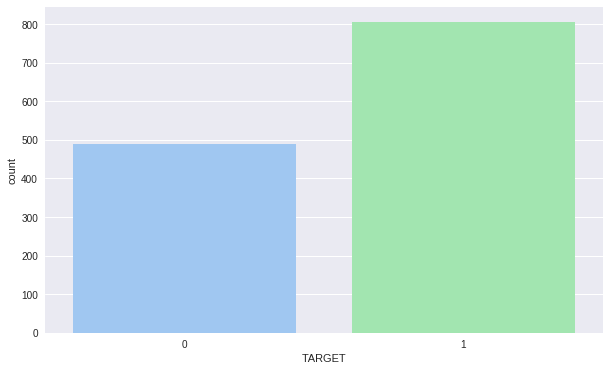

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(nba['TARGET'],palette="pastel")
nba['TARGET'].value_counts()

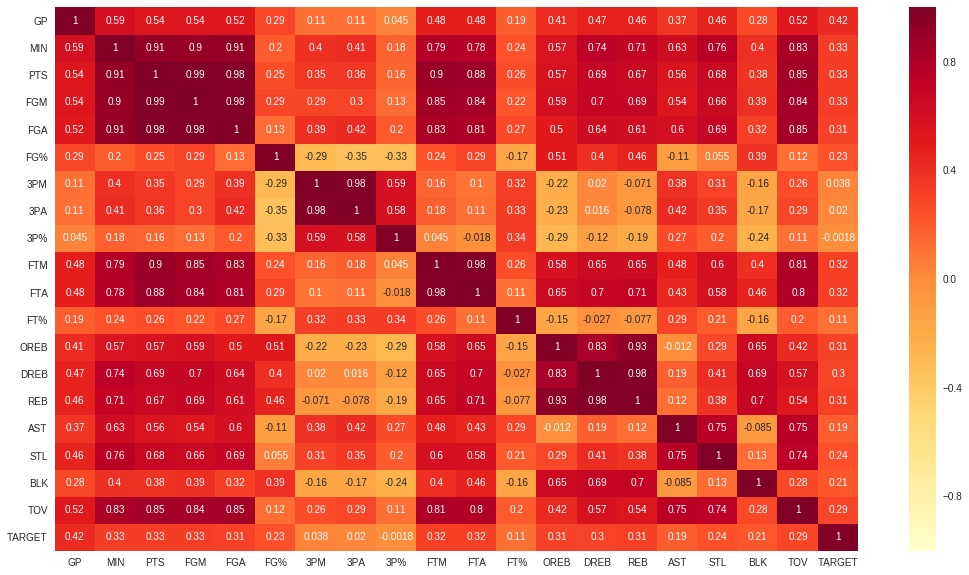

In [0]:
plt.figure(figsize=(18,10))
sns.heatmap(nba.corr(),annot=True, cmap = "YlOrRd")

Removing variables 3PM, 3PA, 3P% (3 pointer variables) due to very low correlation with the target variable for better prediction with the model.

REB = OREB + DREB, hence the REB variable is removed from the dataframe

In [0]:
#Dropping the uncorrelated variables

nba.drop(['3PM', '3PA', '3P%', 'REB'], axis=1, inplace=True)

## **Modelling**

In [0]:
#DataFrame to be used for fitting in the model

nba_model = nba

Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.73
[[ 85  65]
 [ 39 200]]
              precision    recall  f1-score   support

           0       0.69      0.57      0.62       150
           1       0.75      0.84      0.79       239

   micro avg       0.73      0.73      0.73       389
   macro avg       0.72      0.70      0.71       389
weighted avg       0.73      0.73      0.73       389



Text(0.5, 257.44, 'Predicted label')

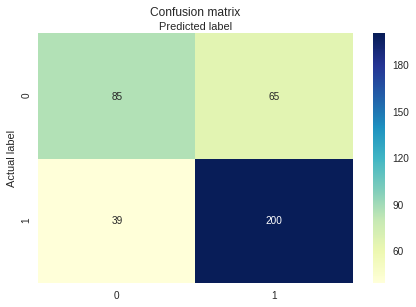

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


X = nba_model.drop(['Name','TARGET'], axis=1).values
y = nba_model['TARGET'].values

logreg = LogisticRegression()

#Creating a 70-30 split for the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

#Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Classification Report

print(classification_report(y_test, y_pred))


#Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion Matrix Evaluation Metrics**

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7326478149100257
Precision: 0.7547169811320755
Recall: 0.8368200836820083


**ROC Curve**

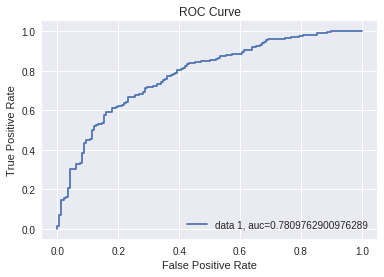

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

## **Conclusion**

Classification rate = 0.73

Accuracy of the model is 73%

Precision = 0.75  

When the model predicts that a player's career will span more than 5 years, it is correct 75% of the time

Recall = 0.84

The logistic regression model can identify 84% of the times when a player will play for over 5 years

Area under the curve (AUC) score for the case is 78%